# ANN project week9

**During the week you will:**
- create a virtual environment for your project (done)
- collect an image dataset with your webcam (done)
- build a neural network from scratch (not finished)
- train a neural network using a pre-built image dataset of handwritten digits (done)
- read in and process the images to be used in a machine learning model (try!!)
- use a pre-trained neural network to make predictions of images from your webcam
- fine-tune a pre-trained network

**1. Build a neural network from scratch**

In [1]:
#import all needed packages or libraries
from sklearn.datasets import make_moons
import numpy as np
from matplotlib import pyplot as plt
import math
from math import e
%matplotlib inline

In [2]:
#all possibly needed functions
def sigmoid(x):
    return 1 / (1 + e** -x)
def sigmoid_der(x):
    """ This function returns the derivative of the sigmoid."""
    return sigmoid(x)*(1-sigmoid(x))
def relu(x):
    return max(x,x)
def tanh(x):
    return (e**x - e**-x) / (e**x + e**-x)
def log_loss(y, ypred):
    """log is natural logarithm"""
    return -(y * np.log(ypred) + (1-y) * np.log(1-ypred)) 
def log_loss_deriv(y, ypred):  
    """Derivative of log_loss with respect to ypred. """
    return -(y/ypred-(1-y)/(1-ypred))

In [3]:
#create the features and the response
X,y = make_moons(n_samples=800, noise=0.2, random_state=0)

In [4]:
#check up the shape of X matrix and y
X.shape, y.shape

((800, 2), (800,))

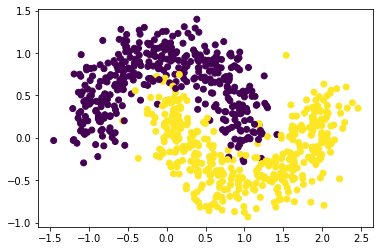

In [5]:
#plot the X according to y
plt.scatter(X[:,0], X[:,1], c=y);

In [6]:
X.shape

(800, 2)

I need the weights and the bias
-  The Input had 2 features +1 bias and I will build a network with **3 neurons in the first and 2 neuron** in the second layer.

In [7]:
# Random Input/Output weigths 
weights1 = np.random.rand(3,3)
weights2=np.random.rand(4,2)

In [8]:
#check the shape
weights1.shape, weights2.shape

((3, 3), (4, 2))

In [9]:
# add the bias using the function
X=np.hstack((X,np.ones((X.shape[0],1))))
X.shape

(800, 3)

- calculate the input of the first layer

In [10]:
#Input to the first layer
Input_1= np.dot(X, weights1) 

In [11]:
Input_1.shape

(800, 3)

- Activation function layer 1

In [12]:
#Output of the first layer
output_1 = sigmoid(Input_1)#the input of the second layer

In [13]:
output_1.shape

(800, 3)

In [14]:
#add the bias to the first output to feed it into the second layer
X2=np.hstack((output_1,np.ones((output_1.shape[0],1))))
X2.shape

(800, 4)

In [15]:
# calculate the Input_2
Input_2 = np.dot(X2, weights2)

- Activation function layer 2

In [16]:
#Output of the first layer
output_2 = sigmoid(Input_2)#the output of the second layer

In [17]:
output_2.shape

(800, 2)

In [18]:
#check up the loss
#reshaping the y-true
yt = y.reshape(-1,1)
f'the LogLoss is: {round(log_loss(yt, output_2).sum(),2)}' #which i have no clue what it referes to

'the LogLoss is: 1769.42'

In [19]:
#derivatives from the loss function------------ASK
deriv_log_loss = log_loss_deriv(yt, output_2)
deriv_log_loss.shape

(800, 2)

In [20]:
#derivatives from the activation function------------ASK
hidden_bias=np.hstack((output_1,np.ones((output_1.shape[0],1))))
sig_deriv_1 = sigmoid_der(hidden_bias.dot(weights2))
y_l2 =  sig_deriv_1 * deriv_log_loss
print(y_l2.shape)

(800, 2)


In [21]:
#calculate the change between two layers
#set up the learning rate
lr = 0.3
#calculate the gradient of this middle output.
delta_w2 = -np.dot(y_l2.transpose(), hidden_bias) * lr
print(delta_w2.shape) 

(2, 4)


In [22]:
#now modify the weights according to the gradient
weights2_new = weights2 + delta_w2.transpose()

In [23]:
weights2_new.shape

(4, 2)

In [24]:
import pandas as pd
w1=pd.DataFrame(weights2, index=['weights2', 'weights2','weights2','weights2'], columns=['f1', 'f2'])
w2=pd.DataFrame(weights2_new, index=['weights2_new', 'weights2_new','weights2_new','weights2_new'],columns=['f1', 'f2'])
w_second_delta=pd.concat([w1,w2])

<AxesSubplot:>

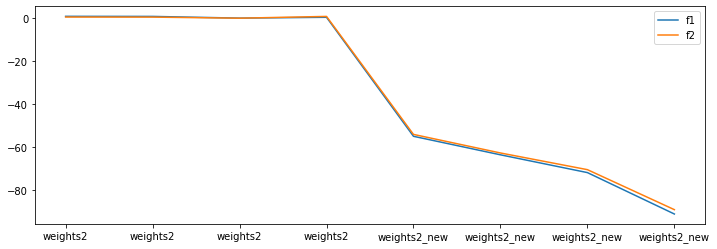

In [25]:
w_second_delta.plot(figsize=(12,4))

In [26]:
#calculate the derivatives in First Set of Weights
sig_deriv_2 = sigmoid_der(X.dot(weights1)) # X is already with bias
#we do not want the bias from the previous layer so we leave it out
h_grad = sig_deriv_2 * np.dot(y_l2 , weights2[:-1].T)

In [27]:
#now calculate the change
delta_w1 = -np.dot(h_grad.transpose(),X) * lr
weights1_new = weights1 + delta_w1.transpose() 

In [28]:
weights1_new; weights1

array([[0.63295074, 0.22746134, 0.81200555],
       [0.24680836, 0.35694694, 0.98004419],
       [0.35234075, 0.63175244, 0.78362951]])

In [29]:
#make a dataframe to plot
w1=pd.DataFrame(weights1, index=['weights1', 'weights1','weights1'], columns=['f1', 'f2', 'bias'])
w2=pd.DataFrame(weights1_new, index=['weights1_new', 'weights1_new','weights1_new'],columns=['f1', 'f2', 'bias'])
w_first_delta=pd.concat([w1,w2])

<AxesSubplot:>

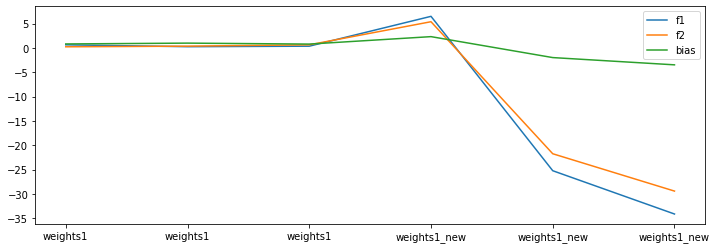

In [30]:
#make a plot
w_first_delta.plot(figsize=(12,4))

**2. Train a neural network using a pre-built image dataset of handwritten digits**

In [31]:
#import all needed libraries
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

In [32]:
#define the train and test datasets
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

In [33]:
#check the shape
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

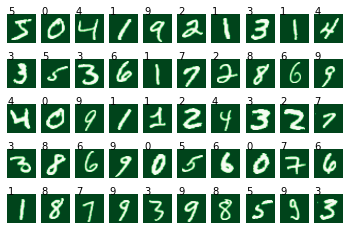

In [34]:
#have a look on the frist 50:
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(xtrain[i], cmap='Greens_r')
    plt.axis('off')
    plt.text(0, 0, ytrain[i]) # displays y-values in each subplot

In [36]:
# Always clear the session!
K.clear_session()
model = keras.models.Sequential()
# input layer
model.add(layers.Dense(units=10, 
                             activation="relu", 
                             input_shape=(784,)
                            ))
# Batch Normalisation:
model.add(layers.BatchNormalization())
# hidden layer(s)
model.add(layers.Dense(units=10, 
             activation="relu"))
model.add(layers.Dropout(0.25))

# output layer
# units/neurons: number of classes
model.add(layers.Dense(units=10,
             activation="softmax")
)

In [37]:
#compile the model
model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# we need an Early stopping:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0.0008, 
    patience=25, #number of epochs with no improvement needed for the model to stop
    verbose=1,
    mode='auto')

In [39]:
# TO FIT THE MODEL we need to reshape our data
xtrain[0].reshape(28*28).shape
# flatten x into one dimension:
xtrain= xtrain.reshape(60000,-1)
xtrain.shape

(60000, 784)

In [40]:
#one-hot encoding y
ytrain = to_categorical(ytrain)

In [41]:
#fit the model to our data
output = model.fit(xtrain, ytrain,
                 epochs=10000, # 1 epoch is 1 iteration over entire X and y data
                 batch_size=600, # number of samples per gradient update
                 validation_split=0.2,
                 callbacks = [early_stop]
                )

Epoch 1/10000
80/80 [==============================] - 1s 8ms/step - loss: 1.9148 - accuracy: 0.3535 - val_loss: 1.4871 - val_accuracy: 0.5500
Epoch 2/10000
80/80 [==============================] - 0s 5ms/step - loss: 1.4085 - accuracy: 0.5478 - val_loss: 1.0288 - val_accuracy: 0.7353
Epoch 3/10000
80/80 [==============================] - 0s 5ms/step - loss: 1.0701 - accuracy: 0.6738 - val_loss: 0.6888 - val_accuracy: 0.8471
Epoch 4/10000
80/80 [==============================] - 0s 5ms/step - loss: 0.8603 - accuracy: 0.7351 - val_loss: 0.5260 - val_accuracy: 0.8783
Epoch 5/10000
80/80 [==============================] - 0s 5ms/step - loss: 0.7799 - accuracy: 0.7505 - val_loss: 0.4626 - val_accuracy: 0.8842
Epoch 6/10000
80/80 [==============================] - 0s 5ms/step - loss: 0.7211 - accuracy: 0.7692 - val_loss: 0.4327 - val_accuracy: 0.8898
Epoch 7/10000
80/80 [==============================] - 0s 5ms/step - loss: 0.6876 - accuracy: 0.7805 - val_loss: 0.3992 - val_accuracy: 0.8961

Epoch 58/10000
80/80 [==============================] - 0s 5ms/step - loss: 0.4235 - accuracy: 0.8765 - val_loss: 0.2995 - val_accuracy: 0.9195
Epoch 59/10000
80/80 [==============================] - 0s 5ms/step - loss: 0.4240 - accuracy: 0.8774 - val_loss: 0.3007 - val_accuracy: 0.9193
Epoch 60/10000
80/80 [==============================] - 0s 5ms/step - loss: 0.4165 - accuracy: 0.8782 - val_loss: 0.3017 - val_accuracy: 0.9192
Epoch 61/10000
80/80 [==============================] - 0s 5ms/step - loss: 0.4185 - accuracy: 0.8776 - val_loss: 0.2998 - val_accuracy: 0.9212
Epoch 62/10000
80/80 [==============================] - 0s 5ms/step - loss: 0.4239 - accuracy: 0.8758 - val_loss: 0.2977 - val_accuracy: 0.9217
Epoch 63/10000
80/80 [==============================] - 0s 5ms/step - loss: 0.4207 - accuracy: 0.8780 - val_loss: 0.2994 - val_accuracy: 0.9183
Epoch 64/10000
80/80 [==============================] - 0s 5ms/step - loss: 0.4145 - accuracy: 0.8807 - val_loss: 0.3020 - val_accuracy:

<AxesSubplot:>

<Figure size 1152x576 with 0 Axes>

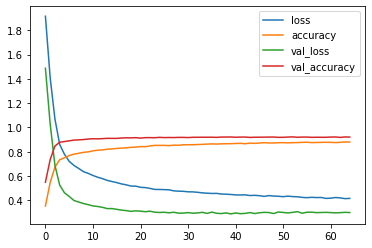

In [42]:
#evaluation
# Plot model accuracy and loss:
import pandas as pd
plt.figure(figsize=(16, 8))
pd.DataFrame(output.history).plot()

**3. Read in and process the images to be used in a machine learning model**

In [169]:
import os
X = []
y = []
classes = ['creme','lime', 'lippenstift']
base_path = "C:\\Users\\Lenovo\\imageclassifier-main\\data\\"

for i, target in enumerate(classes):
    files = os.listdir(base_path+target)
    for file in files:
        #print(i, target, file)
        path_to_file=base_path+target+'\\'+file              
         # load the image    path to image =
        img = keras.preprocessing.image.load_img(path_to_file,target_size=(224,224))
         # convert it to an array
        img_array = np.array(img)
         # append the array to X which is a list so far !!!!! be careful
        X.append(img_array)
         # append the numeric target to y which is also a list
        y.append(i)
         
#make an np.array out of the list       
X = np.array(X)
y = np.array(y)

# shuffle the data    NOT important 
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

In [170]:
X.shape   #i can feed the shape to my input in the model (224,244,3) on the Dense layer

(190, 224, 224, 3)

In [177]:
# I do not the reshaping .. check this!!!!!!!!!!
############## I have no clue ASK Ugur!!!!!!!!!!!!!!!!!! ##################
# TO FIT THE MODEL we need to reshape our data
X[0].reshape(224*224*3).shape
# flatten x into one dimension:
X= X.reshape(190,-1)
X.shape

(190, 150528)

- Define Keras model

In [160]:
#which is probably wrong way to do it !!!!!!!!!!!!!!!!!!

K.clear_session()
model = keras.models.Sequential()

model.add(keras.layers.Dense(
                           units = 1,
                           input_shape = (150528,),
                           activation = keras.activations.sigmoid
                           ))
model.compile(
              optimizer='adam', # the algorithm used to optimize the weights
              loss=keras.losses.binary_crossentropy, # how the loss is quantified (real values)
              metrics=[keras.metrics.binary_accuracy], # how good the model performs (not used by opt. algorithm)
             )
output = model.fit(
                 X,
                 y,
                 epochs=15,
                 batch_size=32,
                 validation_split=0.3,
    
                 # verbose = False,
                )
# hidden layer(s) ##### I have to add a convulation layer : check this later !!!!! not Dense
#model.add(layers.Dense(units=1, 
             #activation="relu"))
#model.add(layers.Dropout(0.25))
# output layer
# units/neurons: number of classes
#model.add(layers.Dense(units=1,
             #activation="sigmoid"))
#The softmax function is used as the activation functio
#to predict a multinomial probability distribution. That is, 
#multi-class classification problems where class membership is required on more than two class labels

Epoch 1/15
3/3 [==============================] - 0s 79ms/step - loss: 5845.2495 - binary_accuracy: 0.5000 - val_loss: 4315.9053 - val_binary_accuracy: 0.5526
Epoch 2/15
3/3 [==============================] - 0s 30ms/step - loss: 2920.7197 - binary_accuracy: 0.4318 - val_loss: 1749.4027 - val_binary_accuracy: 0.4474
Epoch 3/15
3/3 [==============================] - 0s 29ms/step - loss: 828.1710 - binary_accuracy: 0.6818 - val_loss: 377.0637 - val_binary_accuracy: 0.5526
Epoch 4/15
3/3 [==============================] - 0s 32ms/step - loss: 441.4106 - binary_accuracy: 0.7159 - val_loss: 1187.6781 - val_binary_accuracy: 0.4474
Epoch 5/15
3/3 [==============================] - 0s 32ms/step - loss: 433.1245 - binary_accuracy: 0.7955 - val_loss: 633.3964 - val_binary_accuracy: 0.5526
Epoch 6/15
3/3 [==============================] - 0s 29ms/step - loss: 411.6609 - binary_accuracy: 0.6705 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000
Epoch 7/15
3/3 [==============================] - 0

In [161]:
#pd.DataFrame(output.history)

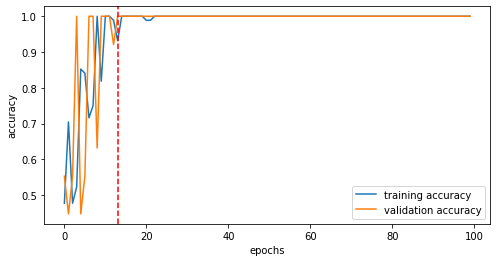

In [165]:
# Plot accuracy curve
plt.figure(figsize=(8, 4))
plt.plot(history.history['binary_accuracy'], label='training accuracy')
plt.plot(history.history['val_binary_accuracy'], label= 'validation accuracy')
plt.axvline(x=13, color='r', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
# maybe an early stop would work better.. just experiment with the one above (from handwritting)

# Progress:
- :( was not  my best week 